# CSCE 554 HW 3
# Marvin Newlin
# 23 Jul 19

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import pandas
import random

import matplotlib.pyplot as plt

#make plots inline using jupyter magic
%matplotlib inline
from IPython.display import Markdown as md  #enable markdown within code cell
from IPython.display import display, Math, Latex
import matplotlib as mpl
from statsmodels.graphics.gofplots import qqplot

## 3.19
A regional opera company has tried three approaches to solicit donations from 24 potential sponsors. The 24 potential sponsors were randomly divided into three groups of eight, and one approach was used for each group. The dollar amounts of the resulting contributions are shown in the following table.

### (a) Do the data indicate that there is a difference in results obtained from the three different approaches? Use α = 0.05.

### (b) Analyze the residuals from this experiment and comment on model adequacy.

### Solution (a)

In [73]:
# Create Arrays for each approach
app_1 = np.array([1000, 1500, 1200, 1800, 1600, 1100, 1000, 1250])
app_2 = np.array([1500, 1800, 2000, 1200, 2000, 1700, 1800, 1900])
app_3 = np.array([900, 1000, 1200, 1500, 1200, 1550, 1000, 1100])

#Convert all values into one array
app_all = np.array([])
app_all = np.append(app_all,app_1)
app_all = np.append(app_all,app_2)
app_all = np.append(app_all,app_3)

alpha = 0.05
n = app_1.size
a = 3
N = a*n

# Find total mean and mean of each approach
app_all_mean = app_all.mean()
app_1_mean = app_1.mean()
app_2_mean = app_2.mean()
app_3_mean = app_3.mean()

# ANOVA

# Residuals of all values minus total mean
app_all_diff = app_all - app_all_mean

# Difference between each approach mean and total mean
app_mean_list = np.array([app_1_mean, app_2_mean, app_3_mean])
app_mean_diff = app_mean_list - app_all_mean


SST = np.dot(app_all_diff.T,app_all_diff)
SSTreat = n*np.dot(app_mean_diff.T,app_mean_diff)
SSE = SST - SSTreat

MSTreat = SSTreat/(a-1)
MSE = SSE/(N-a)
F_0 = MSTreat/MSE

# Calculate P_val from F_0 score
p_val = 1 - stats.f.cdf(F_0,a-1,N-a)

# Calculate Critical F-Value (two-tailed)
f_crit = stats.f.ppf(1-alpha,a-1,N-a)

display(md("SST: {:.3f}".format(SST)))
display(md("SS_Treatments: {:.3f}".format(SSTreat)))
display(md("SSE: {:.3f}".format(SSE)))
display(md("MS_Treatments: {:.3f}".format(MSTreat)))
display(md("MSE: {:.3f}".format(MSE)))
display(md("F_0: {:.3f}".format(F_0)))
display(md("Critical F-Value: {:.3f}".format(f_crit)))
display(md("p-value: {:.3f}".format(p_val)))

SST: 2883333.333

SS_Treatments: 1362708.333

SSE: 1520625.000

MS_Treatments: 681354.167

MSE: 72410.714

F_0: 9.410

Critical F-Value: 3.467

p-value: 0.001

Answer: Given that the value of $F_0 = 9.41 > 3.467 = F_{\alpha,a-1,N-a}$ and the $p$-value $ = 0.001 < \alpha = 0.05$, the result is significant and is unlikely to have occured by chance. Thus, we can reject the null hypothesis $H_0: \mu_i = \mu_j, \forall i \neq j$. Thus, we can conclude that there is a difference in from the three approaches.

### Solution (b)

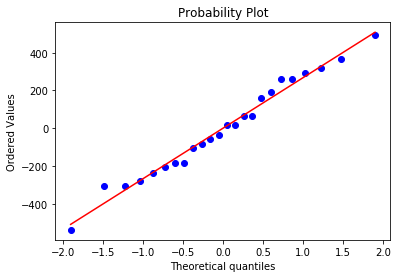

In [15]:
residuals = np.array([])
resid1 = app_1 - app_1_mean
resid2 = app_2 - app_2_mean
resid3 = app_3 - app_3_mean
residuals = np.append(residuals,resid1)
residuals = np.append(residuals,resid2)
residuals = np.append(residuals,resid3)
stats.probplot(residuals, plot=plt)
plt.show()

Examining the residuals in the plot above, we see that the residuals fit the line pretty well. Due to this fit and the fact that there are no obvious patterns to the residuals, this indicates that the residuals are normally distributed. Thus, we can conclude that the model is adequate. 

## 3.20

(a) Does the firing temperature affect the density of the
bricks? Use α = 0.05.

(c) Analyze the residuals from this experiment. Are the
analysis of variance assumptions satisfied?

(d) Construct a graphical display of the treatment as
described in Section 3.5.3. Does this graph adequately
summarize the results of the analysis of variance in
part (a)?

### Solution (a)

Due to the unbalanced design of this experiment ($n_1 = n_3 \neq n_2 = n_4$), we must use the manual computational formulas for $SS_T$ and $SS_{Treatments}$

$$ SS_T = \sum_{i=1}^{a}\sum_{j=1}^{n_i}(y_{ij}-y_{..})^2 $$

$$ SS_{Treatments} = \sum_{i=1}^a n_i(\bar{y_{i.}} - \bar{y_{..}})^2$$


In [74]:
temp_100 = np.array([21.8, 21.9, 21.7, 21.6, 21.7])
temp_125 = np.array([21.7, 21.4, 21.5, 21.4])
temp_150 = np.array([21.9, 21.8, 21.8, 21.6, 21.5])
temp_175 = np.array([21.9, 21.7, 21.8, 21.4])

alpha = 0.05
a = 4
# Manual calculation of N due to unbalanced design
N = 5 + 4 + 5 + 4
n_vec = np.array([5,4,5,4])

temp_all = np.array([])
temp_all = np.append(temp_all, temp_100)
temp_all = np.append(temp_all, temp_125)
temp_all = np.append(temp_all, temp_150)
temp_all = np.append(temp_all, temp_175)

#Calculate total mean and treatment means
temp_all_mean = temp_all.mean()
temp_100_mean = temp_100.mean()
temp_125_mean = temp_125.mean()
temp_150_mean = temp_150.mean()
temp_175_mean = temp_175.mean()

# Calculate difference of all values from total mean (manual version)
temp_all_diff = temp_all - temp_all_mean

# Calculate difference of each treatment mean square from overall mean square (manual version for unbalanced design)
temp_mean_diff = np.array([temp_100_mean, temp_125_mean, temp_150_mean, temp_175_mean]) - temp_all_mean

# ANOVA Stats
SST = np.dot(temp_all_diff.T,temp_all_diff) # Manual version
SSTreat = np.dot(n_vec.T, np.square(temp_mean_diff))
SSE = SST - SSTreat

MSTreat = SSTreat/(a-1)
MSE = SSE/(N-a)
F_0 = MSTreat/MSE

# Calculate P_val from F_0 score
p_val = 1 - stats.f.cdf(F_0,a-1,N-a)

# Calculate Critical F-Value (two-tailed)
f_crit = stats.f.ppf(1-alpha,a-1,N-a)

display(md("SST: {:.3f}".format(SST)))
display(md("SS_Treatments: {:.3f}".format(SSTreat)))
display(md("SSE: {:.3f}".format(SSE)))
display(md("MS_Treatments: {:.3f}".format(MSTreat)))
display(md("MSE: {:.3f}".format(MSE)))
display(md("F_0: {:.3f}".format(F_0)))
display(md("Critical F-Value: {:.3f}".format(f_crit)))
display(md("p-value: {:.3f}".format(p_val)))

SST: 0.516

SS_Treatments: 0.156

SSE: 0.360

MS_Treatments: 0.052

MSE: 0.026

F_0: 2.024

Critical F-Value: 3.344

p-value: 0.157

Answer: This yields $F_0 = 2.024 < 3.344 = F_{0.05,3,15}$. Additionally, the $p$-value is 0.157 which is greater than our threshold of 0.05. Thus, we can conclude here that there is not a significant difference between the means, so we fail to reject the null hypothesis that the temperature does not affect the density.


### Solution (c)

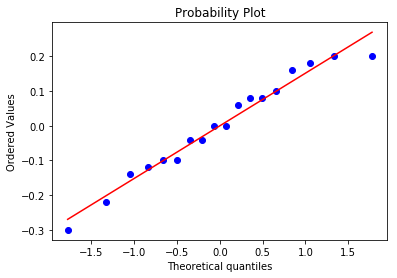

In [90]:
residuals = np.array([])
resid1 = temp_100 - temp_100_mean
resid2 = temp_125 - temp_125_mean
resid3 = temp_150 - temp_150_mean
resid4 = temp_175 - temp_175_mean
residuals = np.append(residuals,resid1)
residuals = np.append(residuals,resid2)
residuals = np.append(residuals,resid3)
residuals = np.append(residuals,resid4)
stats.probplot(residuals, plot=plt)
plt.show()

Answer: The ANOVA assumption for the residuals is that they belong to $N(0,\sigma^2)$ where $\sigma^2$ is unknown. Examining the plot above, we see that the residuals do appear to fit this distribution since they fit the red line well. Thus the residuals appear to be normally distributed and the ANOVA assumptions are satisfied.

### Solution (d)

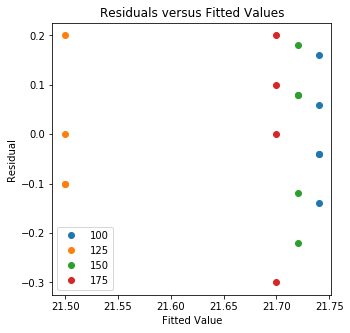

In [101]:
resid_1_x = np.array([temp_100_mean, temp_100_mean, temp_100_mean, temp_100_mean, temp_100_mean])
resid_2_x = np.array([temp_125_mean, temp_125_mean, temp_125_mean, temp_125_mean])
resid_3_x = np.array([temp_150_mean, temp_150_mean, temp_150_mean, temp_150_mean, temp_150_mean])
resid_4_x = np.array([temp_175_mean, temp_175_mean, temp_175_mean, temp_175_mean])

fig = plt.figure(figsize=(5,5))
plt.plot(resid_1_x,resid1, 'o', label='100')
plt.plot(resid_2_x,resid2, 'o', label='125')
plt.plot(resid_3_x,resid3, 'o', label='150')
plt.plot(resid_4_x,resid4, 'o', label='175')
plt.title("Residuals versus Fitted Values")
plt.ylabel("Residual")
plt.xlabel("Fitted Value")
plt.legend()
plt.show()

Answer: Examining the residuals we see that for the most part, the variance appears to be constant. Thus, the ANOVA assumptions are satisfied.

## 3.30

(a) Are the lives of these brands of batteries different?


(b) Analyze the residuals from this experiment.

(c) Construct a 95 percent confidence interval estimate on the mean life of battery brand 2. Construct a 99 percent confidence interval estimate on the mean difference between the lives of battery brands 2 and 3.


(d) Which brand would you select for use? If the manufacturer will replace without charge any battery that fails in less than 85 weeks, what percentage would the company expect to replace?

### Solution (a)

In [44]:
brand_1 = np.array([100, 96, 92, 96, 92])
brand_2 = np.array([76, 80, 75, 84, 82])
brand_3 = np.array([108, 100, 96, 98, 100])

brand_all = np.array([])
brand_all = np.append(brand_all, brand_1)
brand_all = np.append(brand_all, brand_2)
brand_all = np.append(brand_all, brand_3)

n = 5
a = 3
N = a*n

# Calculate means
brand_all_mean = brand_all.mean()
brand_1_mean = brand_1.mean()
brand_2_mean = brand_2.mean()
brand_3_mean = brand_3.mean()

# Calculate difference from total mean and difference between treatment means
brand_all_diff = brand_all - brand_all_mean
brand_mean_diff = np.array([(brand_1_mean - brand_all_mean),(brand_2_mean - brand_all_mean), (brand_3_mean - brand_all_mean)])

# ANOVA Stats
SST = np.dot(brand_all_diff.T,brand_all_diff)
SSTreat = n*np.dot(brand_mean_diff.T, brand_mean_diff)
SSE = SST - SSTreat

MSTreat = SSTreat/(a-1)
MSE = SSE/(N-a)
F_0 = MSTreat/MSE

# Calculate P_val from F_0 score
p_val = 1 - stats.f.cdf(F_0,a-1,N-a)

# Calculate Critical F-Value (two-tailed)
f_crit = stats.f.ppf(1-alpha,a-1,N-a)

display(md("SST: {:.3f}".format(SST)))
display(md("SS_Treatments: {:.3f}".format(SSTreat)))
display(md("SSE: {:.3f}".format(SSE)))
display(md("MS_Treatments: {:.3f}".format(MSTreat)))
display(md("MSE: {:.3f}".format(MSE)))
display(md("F_0: {:.3f}".format(F_0)))
display(md("Critical F-Value: {:.3f}".format(f_crit)))
display(md("p-value: {}".format(p_val)))

SST: 1383.333

SS_Treatments: 1196.133

SSE: 187.200

MS_Treatments: 598.067

MSE: 15.600

F_0: 38.338

Critical F-Value: 3.885

p-value: 6.141493753442084e-06



Answer: Assuming alpha = 0.05 and given that $F_0 = 38.338 > 3.885 = F_{0.05,3,17}$ and the $p$-value $= 6.14 \times 10^{-6} < \alpha = 0.05$, we can confidently say that there is a significant difference in the lives of the battery brands and we can reject the null hypothesis that the mean battery lives are the same.  

### Solution (b)

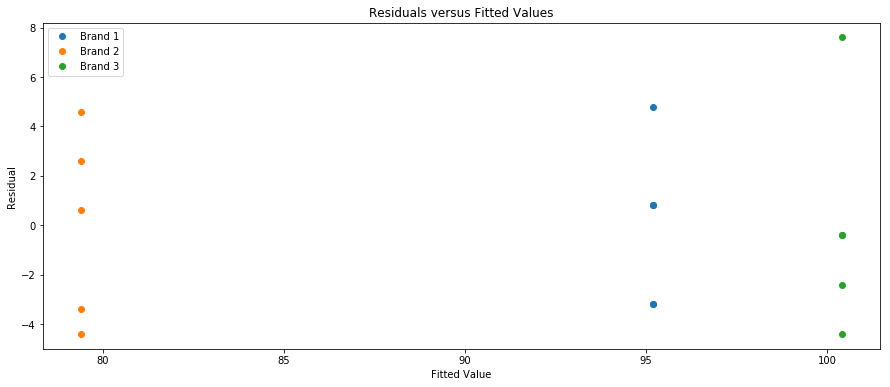

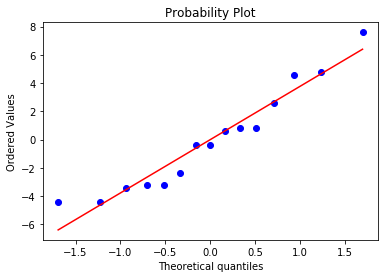

In [125]:
resid1 = brand_1 - brand_1_mean
resid2 = brand_2 - brand_2_mean
resid3 = brand_3 - brand_3_mean
residuals = np.hstack((resid1, resid2, resid3))


resid_1_x = np.array([brand_1_mean, brand_1_mean, brand_1_mean, brand_1_mean, brand_1_mean])
resid_2_x = np.array([brand_2_mean, brand_2_mean, brand_2_mean, brand_2_mean, brand_2_mean])
resid_3_x = np.array([brand_3_mean, brand_3_mean, brand_3_mean, brand_3_mean, brand_3_mean])

fig = plt.figure(figsize=(15,6))
plt.plot(resid_1_x,resid1, 'o', label='Brand 1')
plt.plot(resid_2_x,resid2, 'o', label='Brand 2')
plt.plot(resid_3_x,resid3, 'o', label='Brand 3')

plt.title("Residuals versus Fitted Values")
plt.ylabel("Residual")
plt.xlabel("Fitted Value")
plt.legend()
plt.show()

stats.probplot(residuals, plot=plt)
plt.show()

Answer: The residuals aren't exactly a perfect fit to the line with a couple of outliers. However, the fit is good enough and there are no obvious patterns to the residuals. Additionally, the residuals versus fits appear to be have very similar variances. With these observations, it seems that the ANOVA assumptions are satisfied. 

### Solution (c)

In [65]:
# 95% confidence interval for brand 2
alpha = 0.05
bound_t_val = stats.t.ppf((1-alpha/2),(N-a)) # t-table lookup value
std_est = np.sqrt(MSE/n)
lower = brand_2_mean - bound_t_val*std_est
upper = brand_2_mean + bound_t_val*std_est


display(md("95% Confidence Interval for brand 2: [{:.3f}, {:.3f}]".format(lower,upper)))

95% Confidence Interval for brand 2: [75.551, 83.249]

In [66]:
# 99% confidence interval for difference between brand 2 and brand 3
alpha = 0.95
mean_diff_2_3 = brand_2_mean - brand_3_mean
bound_t_val = 3.055 # t-table score for t(0.01/2,12)
std_est = np.sqrt(2*MSE/n)
lower = mean_diff_2_3 - bound_t_val*std_est
upper = mean_diff_2_3 + bound_t_val*std_est
display(md("99% confidence interval for mean difference between brand 2 and brand 3: [{:.3f}, {:.3f}]".format(lower,upper)))

99% confidence interval for mean difference between brand 2 and brand 3: [-28.631, -13.369]

Answer: Based on the above code, we see that a 95% confidence interval for brand 2 is given by $75.551 \leq \mu_2 \leq 83.249$. 

Additionally, we see that a 99% confidence interval for the mean difference between brand 2 and brand 3 is given by $-28.361 \leq \mu_2 - \mu_3 \leq -13.396$

### Solution (d)

In [70]:
bound_val = 85
prob = stats.t.cdf(x=bound_val,df=(N-a),loc=brand_3_mean,scale=np.sqrt(MSE/n))
print(prob)

7.711499913422586e-07


Given that brand 3 has the highest mean life, my choice would be brand 3. 

## 3.32

(a) Do all five materials have the same effect on mean failure time?

(b) Plot the residuals versus the predicted response. Construct a normal probability plot of the residuals. What information is conveyed by these plots?

(c) Based on your answer to part (b), conduct another analysis of the failure time data and draw appropriate conclusions.

### Solution (a)

In [108]:
mat_1 = np.array([110, 157, 194, 178])
mat_2 = np.array([1, 2, 4, 18])
mat_3 = np.array([880, 1256, 5276, 4355])
mat_4 = np.array([495, 7040, 5307, 10050])
mat_5 = np.array([7, 5, 29, 2])

a = 5
n = 4
N = a*n

mat_all = np.hstack((mat_1, mat_2, mat_3, mat_4, mat_5))

# Calculate Means
mat_all_mean = mat_all.mean()
mat_1_mean = mat_1.mean()
mat_2_mean = mat_2.mean()
mat_3_mean = mat_3.mean()
mat_4_mean = mat_4.mean()
mat_5_mean = mat_5.mean()

mean_all = np.hstack((mat_1_mean, mat_2_mean, mat_3_mean, mat_4_mean, mat_5_mean))

# Calculate differences
mat_all_diff = mat_all - mat_all_mean
mean_all_diff = mean_all - mat_all_mean

# ANOVA
SST = np.dot(mat_all_diff.T, mat_all_diff)
SSTreat = n*np.dot(mean_all_diff.T, mean_all_diff)
SSE = SST - SSTreat

MSTreat = SSTreat/(a-1)
MSE = SSE/(N-a)
F_0 = MSTreat/MSE

# Calculate P_val from F_0 score
p_val = 1 - stats.f.cdf(F_0,a-1,N-a)

# Calculate Critical F-Value (two-tailed)
f_crit = stats.f.ppf(1-alpha,a-1,N-a)

display(md("SST: {:.3f}".format(SST)))
display(md("SS_Treatments: {:.3f}".format(SSTreat)))
display(md("SSE: {:.3f}".format(SSE)))
display(md("MS_Treatments: {:.3f}".format(MSTreat)))
display(md("MSE: {:.3f}".format(MSE)))
display(md("F_0: {:.3f}".format(F_0)))
display(md("Critical F-Value: {:.3f}".format(f_crit)))
display(md("p-value: {}".format(p_val)))


SST: 165697146.200

SS_Treatments: 103191489.200

SSE: 62505657.000

MS_Treatments: 25797872.300

MSE: 4167043.800

F_0: 6.191

Critical F-Value: 3.056

p-value: 0.003785956296380344

Answer: Based on the value of $F_0 > F_{crit}$ and the $p$-value less than 0.05, we can conclude that there is a difference in the mean failure times.  

### Solution (b)


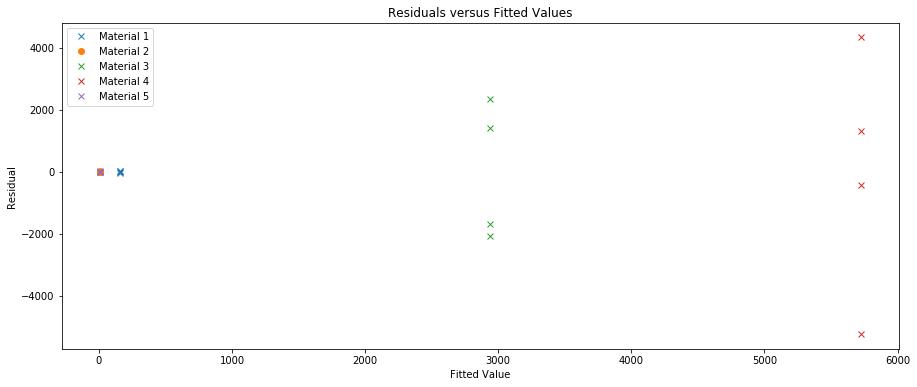

In [114]:
resid1 = mat_1 - mat_1_mean
resid2 = mat_2 - mat_2_mean
resid3 = mat_3 - mat_3_mean
resid4 = mat_4 - mat_4_mean
resid5 = mat_5 - mat_5_mean


resid_1_x = np.array([mat_1_mean, mat_1_mean, mat_1_mean, mat_1_mean])
resid_2_x = np.array([mat_2_mean, mat_2_mean, mat_2_mean, mat_2_mean])
resid_3_x = np.array([mat_3_mean, mat_3_mean, mat_3_mean, mat_3_mean])
resid_4_x = np.array([mat_4_mean, mat_4_mean, mat_4_mean, mat_4_mean])
resid_5_x = np.array([mat_5_mean, mat_5_mean, mat_5_mean, mat_5_mean])

fig = plt.figure(figsize=(15,6))
plt.plot(resid_1_x,resid1, 'x', label='Material 1')
plt.plot(resid_2_x,resid2, 'o', label='Material 2')
plt.plot(resid_3_x,resid3, 'x', label='Material 3')
plt.plot(resid_4_x,resid4, 'x', label='Material 4')
plt.plot(resid_5_x,resid5, 'x', label='Material 5')
plt.title("Residuals versus Fitted Values")
plt.ylabel("Residual")
plt.xlabel("Fitted Value")
plt.legend()
plt.show()


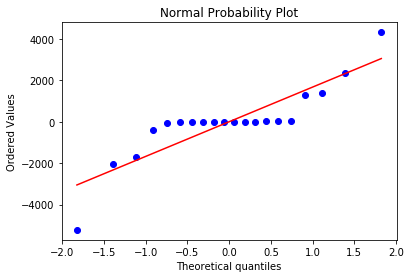

In [113]:
residuals = np.hstack((resid1, resid2, resid3, resid4, resid5))
stats.probplot(residuals, plot=plt)
plt.title("Normal Probability Plot")
plt.show()

Answer: Examining the plot of the residuals and the normal probability plot we see two issues. First, the variance between each treatment is drastically different so the constant variance assumption of ANOVA is violated. Additionally, we see that the residuals are not normally distributed, another violation of the ANOVA assumptions. 

### Solution (c) 

Based on the observations from (b), we need to transform the data and then run ANOVA again. 

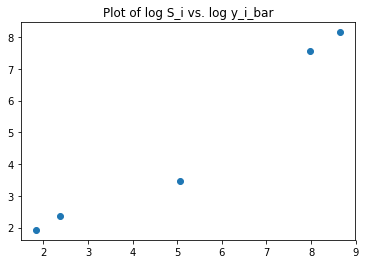

In [118]:
mat_1 = np.array([110, 157, 194, 178])
mat_2 = np.array([1, 2, 4, 18])
mat_3 = np.array([880, 1256, 5276, 4355])
mat_4 = np.array([495, 7040, 5307, 10050])
mat_5 = np.array([7, 5, 29, 2])

a = 5
n = 4
N = a*n

mat_all = np.hstack((mat_1, mat_2, mat_3, mat_4, mat_5))

# Transform the data
mat_1_mean = mat_1.mean()
mat_2_mean = mat_2.mean()
mat_3_mean = mat_3.mean()
mat_4_mean = mat_4.mean()
mat_5_mean = mat_5.mean()
mat_means_all = np.hstack((mat_1_mean, mat_2_mean, mat_3_mean, mat_4_mean, mat_5_mean))

mat_1_std = mat_1.std()
mat_2_std = mat_2.std()
mat_3_std = mat_3.std()
mat_4_std = mat_4.std()
mat_5_std = mat_5.std()

log_si = np.array([np.log(mat_1_std), np.log(mat_2_std), np.log(mat_3_std), np.log(mat_4_std), np.log(mat_5_std)])
log_mui = np.log(mat_means_all)

plt.plot(log_mui, log_si, 'o')
plt.title("Plot of log S_i vs. log y_i_bar")
plt.show()


Inspecting the plot of $\log(S_i)$ versus $\log(\bar{y_{i.}})$ we see that a best fit line approximately passes through (2,2) and (8,7.5). Using the point slope formula this yields a slope that is approximately 1. This means that for our purposes $\alpha = 1$ and based on table 3.9, $\lambda = 0$ so the best transformation to use here is a logarithmic transformation of the data. 

We will logarithmically transform the data and perform ANOVA to see if the results are any better. 

In [119]:
mat_1_transformed = np.log(mat_1)
mat_2_transformed = np.log(mat_2)
mat_3_transformed = np.log(mat_3)
mat_4_transformed = np.log(mat_4)
mat_5_transformed = np.log(mat_5)
mat_all_transformed = np.log(mat_all)

mat_1_transformed_mean = mat_1_transformed.mean()
mat_2_transformed_mean = mat_2_transformed.mean()
mat_3_transformed_mean = mat_3_transformed.mean()
mat_4_transformed_mean = mat_4_transformed.mean()
mat_5_transformed_mean = mat_5_transformed.mean()
mat_all_transformed_mean = mat_all_transformed.mean()

mat_all_transformed_diff = mat_all_transformed - mat_all_transformed_mean

mat_mean_diff = np.hstack((mat_1_transformed_mean, mat_2_transformed_mean, mat_3_transformed_mean, 
                           mat_4_transformed_mean, mat_5_transformed_mean)) - mat_all_transformed_mean

# ANOVA
SST = np.dot(mat_all_transformed_diff.T, mat_all_transformed_diff)
SSTreat = n*np.dot(mat_mean_diff.T, mat_mean_diff)
SSE = SST - SSTreat

MSTreat = SSTreat/(a-1)
MSE = SSE/(N-a)
F_0 = MSTreat/MSE

# Calculate P_val from F_0 score
p_val = 1 - stats.f.cdf(F_0,a-1,N-a)

# Calculate Critical F-Value (two-tailed)
f_crit = stats.f.ppf(1-alpha,a-1,N-a)

display(md("SST: {:.3f}".format(SST)))
display(md("SS_Treatments: {:.3f}".format(SSTreat)))
display(md("SSE: {:.3f}".format(SSE)))
display(md("MS_Treatments: {:.3f}".format(MSTreat)))
display(md("MSE: {:.3f}".format(MSE)))
display(md("F_0: {:.3f}".format(F_0)))
display(md("Critical F-Value: {:.3f}".format(f_crit)))
display(md("p-value: {}".format(p_val)))




SST: 181.493

SS_Treatments: 165.056

SSE: 16.437

MS_Treatments: 41.264

MSE: 1.096

F_0: 37.657

Critical F-Value: 3.056

p-value: 1.1760925033854619e-07

Answer: With the transformed values, the difference is actually more significant than it was originally, with the $F_0$ value being far greater than $F_{crit}$ and the $p$-value of $1.18 \times 10^{-7}$ being far less than the threshold of $0.05$. Based on this, we can conclude that the mean failure times are different.

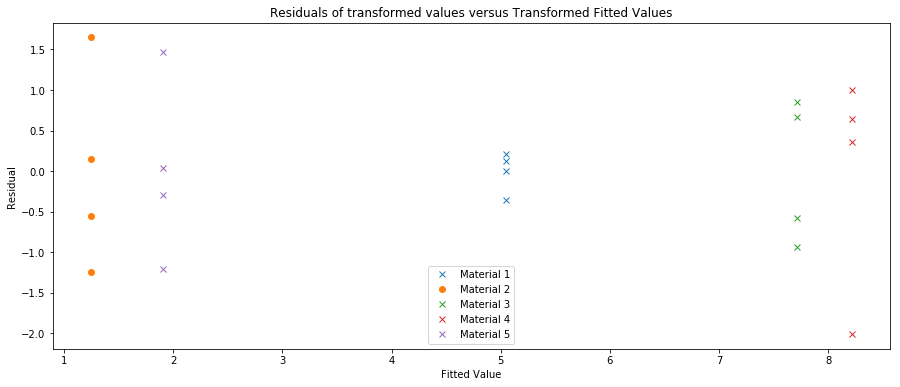

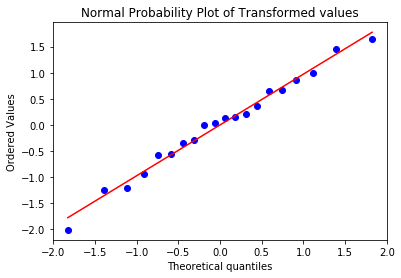

In [123]:
resid1_transformed = mat_1_transformed - mat_1_transformed_mean
resid2_transformed = mat_2_transformed - mat_2_transformed_mean
resid3_transformed = mat_3_transformed - mat_3_transformed_mean
resid4_transformed = mat_4_transformed - mat_4_transformed_mean
resid5_transformed = mat_5_transformed - mat_5_transformed_mean


resid_1_x = np.array([mat_1_transformed_mean, mat_1_transformed_mean, mat_1_transformed_mean, mat_1_transformed_mean])
resid_2_x = np.array([mat_2_transformed_mean, mat_2_transformed_mean, mat_2_transformed_mean, mat_2_transformed_mean])
resid_3_x = np.array([mat_3_transformed_mean, mat_3_transformed_mean, mat_3_transformed_mean, mat_3_transformed_mean])
resid_4_x = np.array([mat_4_transformed_mean, mat_4_transformed_mean, mat_4_transformed_mean, mat_4_transformed_mean])
resid_5_x = np.array([mat_5_transformed_mean, mat_5_transformed_mean, mat_5_transformed_mean, mat_5_transformed_mean])

fig = plt.figure(figsize=(15,6))
plt.plot(resid_1_x,resid1_transformed, 'x', label='Material 1')
plt.plot(resid_2_x,resid2_transformed, 'o', label='Material 2')
plt.plot(resid_3_x,resid3_transformed, 'x', label='Material 3')
plt.plot(resid_4_x,resid4_transformed, 'x', label='Material 4')
plt.plot(resid_5_x,resid5_transformed, 'x', label='Material 5')
plt.title("Residuals of transformed values versus Transformed Fitted Values")
plt.ylabel("Residual")
plt.xlabel("Fitted Value")
plt.legend()
plt.show()


residuals_transformed = np.hstack((resid1_transformed, resid2_transformed, resid3_transformed, resid4_transformed, resid5_transformed))
stats.probplot(residuals_transformed, plot=plt)
plt.title("Normal Probability Plot of Transformed values")
plt.show()

Answer: The ANOVA results are much better with the transformed values. The plots above show the residuals versus fitted values and the normal probability plot of the residuals. As expected, the transformed residuals have a much closer to constant variance and the residuals are much more normally distributed than before. 

## 3.42

(a) Is there a difference in the chemical types? Use α = 0.05.

(b) Estimate the variability due to chemical types.

(c) Estimate the variability due to random error.

(d) Analyze the residuals from this experiment and comment on model adequacy.

In [71]:
oven_1 = np.array([77.199, 74.466, 92.746, 76.208, 82.876])
oven_2 = np.array([80.522, 79.306, 81.914, 80.436, 73.385])
oven_3 = np.array([79.417, 78.017, 91.596, 80.802, 80.626])
oven_4 = np.array([78.001, 78.358, 77.544, 77.364, 77.386])

a = 4
n = 5
N = a*n